In [41]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
from typing import List
import warnings
import time
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from src.classifierWrapper import BakeoffClassifier
from src.basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from src.apply_dca import apply_label_errors, percentage_to_instance_converter
from src.utils import load_and_expand_yaml, get_frames_and_names
from src.visualizations import visualize_acc_decr, visualize_trace_M, visualize_acc_decr_multiple
from src.current_experiment import Experiment

[2025-06-12 14:54:48] INFO - Custom-named logger active.
[2025-06-12 14:54:48] INFO - Custom-named logger active.


In [ ]:
configuration_2 = load_and_expand_yaml("experiment_2.yaml")

[2025-06-12 14:54:48] INFO - Loading and expanding YAML configuration from: experiment_2.yaml
[2025-06-12 14:54:48] INFO - YAML configuration expanded into 30 configurations


In [19]:
experimental_dict = {}
my_config = configuration_2[0:6]    #3Clx1DSx3RS 
my_config2 = configuration_2[6::3] #1Clx8DS
my_config3 = configuration_2[6:]    #3Clx8DS

for i_, exp_conf in enumerate(my_config3):
    current_exp = Experiment(config=exp_conf, base_path="112UCRFolds", results_root="simulation_results")
    exp_name = "experiment_"+str(i_)
    current_exp.run_experiment()
    experimental_dict[exp_name]=[exp_conf, current_exp]

[2025-06-12 15:14:07] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-06-12 15:14:07] INFO - Initializing Exp with dataset: Adiac, classifier: MR-Hydra, strategy: LabelErrors
[2025-06-12 15:14:07] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}
[2025-06-12 15:14:07] INFO - Run Experiment
[2025-06-12 15:14:07] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-12 15:14:07] INFO - requested_instance_step = 19.5 will be transformed into 20
[2025-06-12 15:14:07] INFO - requested_percentage_step = 5 % || transformed into 5.1282 %
[2025-06-12 15:14:07] INFO - label_names: ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36'
 '37' '4' '5' '6' '7' '8' '9']
[2025-06-12 15:14:07] INFO - Current Label Error Strategy: DEFAULT: l

X_train             : (390, 1, 176)
y_train             : (390,)
X_test              : (391, 1, 176)
y_test              : (391,)
X_train_small       : (390, 1, 176)
y_train_small       : (390,)
X_test_small        : (391, 1, 176)
y_test_small        : (391,)
X_train             : (390, 1, 176)
y_train             : (390,)
X_test              : (391, 1, 176)
y_test              : (391,)
X_train_small       : (390, 1, 176)
y_train_small       : (390,)
X_test_small        : (391, 1, 176)
y_test_small        : (391,)
X_train             : (390, 1, 176)
y_train             : (390,)
X_test              : (391, 1, 176)
y_test              : (391,)
X_train_small       : (390, 1, 176)
y_train_small       : (390,)
X_test_small        : (391, 1, 176)
y_test_small        : (391,)
X_train             : (30, 1, 128)
y_train             : (30,)
X_test              : (150, 1, 128)
y_test              : (150,)
X_train_small       : (30, 1, 128)
y_train_small       : (30,)
X_test_small        : (150, 1

[2025-06-12 15:14:08] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-06-12 15:14:08] INFO - Initializing Exp with dataset: Car, classifier: Weasel-D, strategy: LabelErrors
[2025-06-12 15:14:08] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}
[2025-06-12 15:14:08] INFO - Run Experiment
[2025-06-12 15:14:08] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-12 15:14:08] INFO - requested_instance_step = 3.0 will be transformed into 3
[2025-06-12 15:14:08] INFO - requested_percentage_step = 5 % || transformed into 5.0 %
[2025-06-12 15:14:08] INFO - label_names: ['1' '2' '3' '4']
[2025-06-12 15:14:08] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-12 15:14:08] INFO - The p_vector for the current_experiment: [0.25, 0.25, 0.25, 0.25]
[2025-06-12 15:14:08] INFO - Searching inside simulation_results/Wease

X_train             : (60, 1, 577)
y_train             : (60,)
X_test              : (60, 1, 577)
y_test              : (60,)
X_train_small       : (60, 1, 577)
y_train_small       : (60,)
X_test_small        : (60, 1, 577)
y_test_small        : (60,)
X_train             : (20, 1, 24)
y_train             : (20,)
X_test              : (343, 1, 24)
y_test              : (343,)
X_train_small       : (20, 1, 24)
y_train_small       : (20,)
X_test_small        : (343, 1, 24)
y_test_small        : (343,)
X_train             : (20, 1, 24)
y_train             : (20,)
X_test              : (343, 1, 24)
y_test              : (343,)
X_train_small       : (20, 1, 24)
y_train_small       : (20,)
X_test_small        : (343, 1, 24)
y_test_small        : (343,)
X_train             : (20, 1, 24)
y_train             : (20,)
X_test              : (343, 1, 24)
y_test              : (343,)
X_train_small       : (20, 1, 24)
y_train_small       : (20,)
X_test_small        : (343, 1, 24)
y_test_small        :

[2025-06-12 15:14:08] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-06-12 15:14:08] INFO - Initializing Exp with dataset: Computers, classifier: Weasel-D, strategy: LabelErrors
[2025-06-12 15:14:08] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}
[2025-06-12 15:14:08] INFO - Run Experiment
[2025-06-12 15:14:08] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-12 15:14:08] INFO - requested_instance_step = 12.5 will be transformed into 12
[2025-06-12 15:14:08] INFO - requested_percentage_step = 5 % || transformed into 4.8 %
[2025-06-12 15:14:08] INFO - label_names: ['1' '2']
[2025-06-12 15:14:08] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-12 15:14:08] INFO - The p_vector for the current_experiment: [0.5, 0.5]
[2025-06-12 15:14:08] INFO - Searching inside simulation_results/Weasel-D/Computers 

X_train             : (250, 1, 720)
y_train             : (250,)
X_test              : (250, 1, 720)
y_test              : (250,)
X_train_small       : (250, 1, 720)
y_train_small       : (250,)
X_test_small        : (250, 1, 720)
y_test_small        : (250,)
X_train             : (7200, 1, 46)
y_train             : (7200,)
X_test              : (16800, 1, 46)
y_test              : (16800,)
X_train_small       : (7200, 1, 46)
y_train_small       : (7200,)
X_test_small        : (16800, 1, 46)
y_test_small        : (16800,)


[2025-06-12 15:14:08] INFO - Initializing BakeoffClassifier with name: Quant, random_state: 0
[2025-06-12 15:14:08] INFO - Initializing Exp with dataset: Crop, classifier: Quant, strategy: LabelErrors
[2025-06-12 15:14:08] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}
[2025-06-12 15:14:08] INFO - Run Experiment
[2025-06-12 15:14:08] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-12 15:14:08] INFO - requested_instance_step = 360.0 will be transformed into 360
[2025-06-12 15:14:08] INFO - requested_percentage_step = 5 % || transformed into 5.0 %
[2025-06-12 15:14:08] INFO - label_names: ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '3' '4' '5' '6' '7' '8' '9']
[2025-06-12 15:14:08] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-12 15:14:08] INFO - The p_vector for the current_experiment: 

X_train             : (7200, 1, 46)
y_train             : (7200,)
X_test              : (16800, 1, 46)
y_test              : (16800,)
X_train_small       : (7200, 1, 46)
y_train_small       : (7200,)
X_test_small        : (16800, 1, 46)
y_test_small        : (16800,)


[2025-06-12 15:14:08] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-06-12 15:14:08] INFO - Initializing Exp with dataset: Crop, classifier: Weasel-D, strategy: LabelErrors
[2025-06-12 15:14:08] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}
[2025-06-12 15:14:08] INFO - Run Experiment
[2025-06-12 15:14:08] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-12 15:14:08] INFO - requested_instance_step = 360.0 will be transformed into 360
[2025-06-12 15:14:08] INFO - requested_percentage_step = 5 % || transformed into 5.0 %
[2025-06-12 15:14:08] INFO - label_names: ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '3' '4' '5' '6' '7' '8' '9']
[2025-06-12 15:14:08] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-12 15:14:08] INFO - The p_vector for the current_experi

X_train             : (7200, 1, 46)
y_train             : (7200,)
X_test              : (16800, 1, 46)
y_test              : (16800,)
X_train_small       : (7200, 1, 46)
y_train_small       : (7200,)
X_test_small        : (16800, 1, 46)
y_test_small        : (16800,)
X_train             : (322, 1, 512)
y_train             : (322,)
X_test              : (139, 1, 512)
y_test              : (139,)
X_train_small       : (322, 1, 512)
y_train_small       : (322,)
X_test_small        : (139, 1, 512)
y_test_small        : (139,)
X_train             : (322, 1, 512)
y_train             : (322,)
X_test              : (139, 1, 512)
y_test              : (139,)
X_train_small       : (322, 1, 512)
y_train_small       : (322,)
X_test_small        : (139, 1, 512)
y_test_small        : (139,)


[2025-06-12 15:14:09] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-06-12 15:14:09] INFO - Initializing Exp with dataset: Earthquakes, classifier: Weasel-D, strategy: LabelErrors
[2025-06-12 15:14:09] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}
[2025-06-12 15:14:09] INFO - Run Experiment
[2025-06-12 15:14:09] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-12 15:14:09] INFO - requested_instance_step = 16.1 will be transformed into 16
[2025-06-12 15:14:09] INFO - requested_percentage_step = 5 % || transformed into 4.9689 %
[2025-06-12 15:14:09] INFO - label_names: ['0' '1']
[2025-06-12 15:14:09] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-12 15:14:09] INFO - The p_vector for the current_experiment: [0.5, 0.5]
[2025-06-12 15:14:09] INFO - Searching inside simulation_results/Weasel-D/Earth

X_train             : (322, 1, 512)
y_train             : (322,)
X_test              : (139, 1, 512)
y_test              : (139,)
X_train_small       : (322, 1, 512)
y_train_small       : (322,)
X_test_small        : (139, 1, 512)
y_test_small        : (139,)
X_train             : (100, 1, 96)
y_train             : (100,)
X_test              : (100, 1, 96)
y_test              : (100,)
X_train_small       : (100, 1, 96)
y_train_small       : (100,)
X_test_small        : (100, 1, 96)
y_test_small        : (100,)
X_train             : (100, 1, 96)
y_train             : (100,)
X_test              : (100, 1, 96)
y_test              : (100,)
X_train_small       : (100, 1, 96)
y_train_small       : (100,)
X_test_small        : (100, 1, 96)
y_test_small        : (100,)
X_train             : (100, 1, 96)
y_train             : (100,)
X_test              : (100, 1, 96)
y_test              : (100,)
X_train_small       : (100, 1, 96)
y_train_small       : (100,)
X_test_small        : (100, 1, 96)
y

In [66]:
experimental_dict["experiment_0"][1].dataset["X_train_small"][0].shape

(1, 176)

In [60]:
experimental_dict["experiment_0"][1].meta_

{'problemname': 'adiac',
 'timestamps': False,
 'missing': False,
 'univariate': True,
 'equallength': True,
 'classlabel': True,
 'targetlabel': False,
 'class_values': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37']}

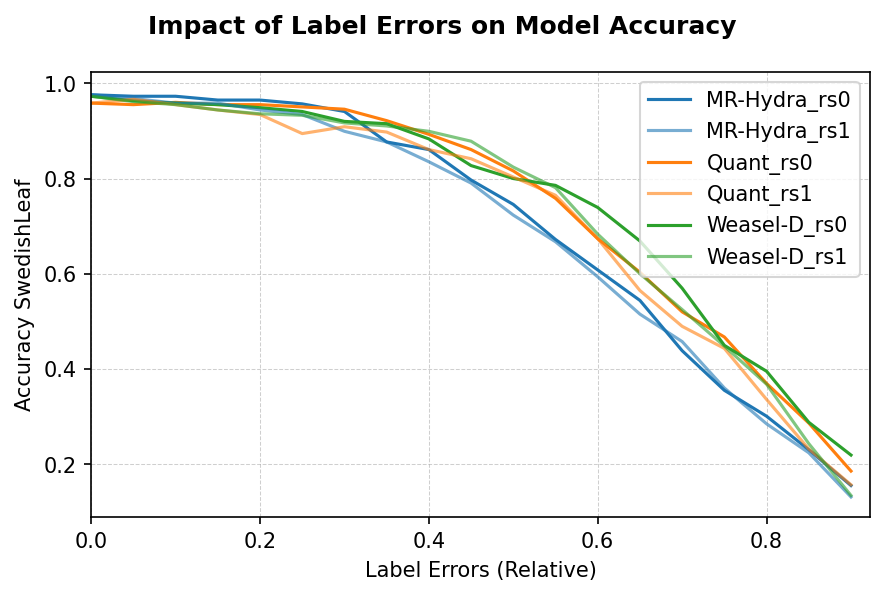

In [16]:
dfs_, clfs_, ds_names, clfs_seed_ = get_frames_and_names(exp_dict = experimental_dict)
visualize_acc_decr_multiple(multiple_df=dfs_, vis_names_=clfs_seed_, ds_="SwedishLeaf", filename_="acc_decr", save_fig=True, exp_folder=None)

In [12]:
experimental_dict["experiment_0"][1].dataset_name

'SwedishLeaf'

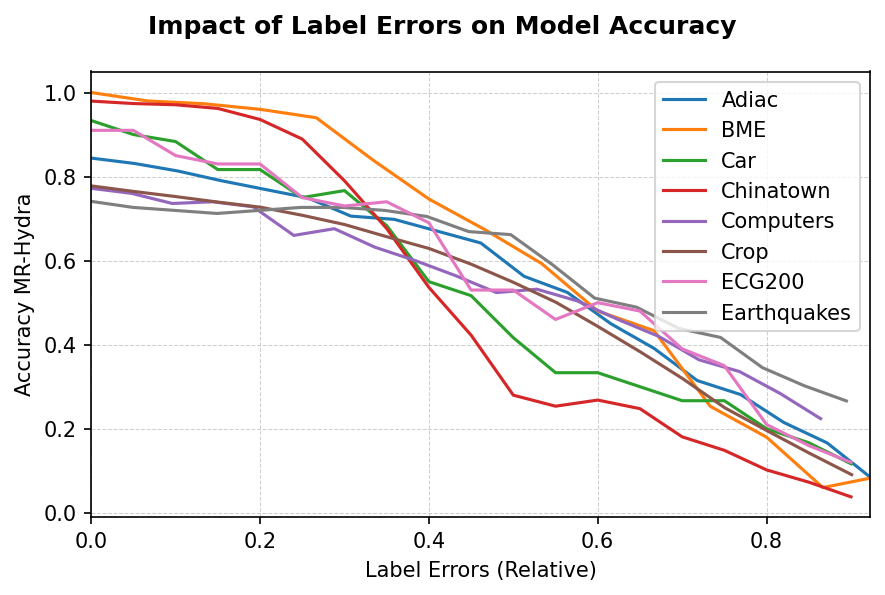

In [18]:
dfs_, clfs_, ds_names, clfs_seed_ = get_frames_and_names(exp_dict = experimental_dict)
visualize_acc_decr_multiple(multiple_df=dfs_, vis_names_=ds_names, ds_="MR-Hydra", filename_="acc_decr", save_fig=True, exp_folder=None)

In [86]:
0.9 * 0.74100

0.6669

In [85]:
dfs_, clfs_, ds_names, clfs_seed_ = get_frames_and_names(exp_dict = experimental_dict)
one_df_ = dfs_[18].loc[0:,"step":"accuracy"]
one_df_

,step,LE_instances,LE_relative,accuracy
0,0,0,0.000000,0.741007
1,1,16,0.049696,0.726619
2,2,32,0.099392,0.719424
3,3,48,0.149088,0.712230
4,4,64,0.198784,0.719424
5,5,80,0.248480,0.726619
6,6,96,0.298176,0.726619
7,7,112,0.347872,0.719424
8,8,128,0.397568,0.705036
9,9,144,0.447264,0.669065


In [100]:
def auc_calculator(df_: pd.DataFrame) -> float:
    """
    Calculate the Area Under the Curve (AUC) for the given DataFrame.
    The DataFrame should contain 'accuracy' and 'LE_relative' columns.
    """
    if 'accuracy' not in df_.columns or 'LE_relative' not in df_.columns:
        raise ValueError("DataFrame must contain 'accuracy' and 'LE_relative' columns.")
    if len(df_) < 2:
        raise ValueError("DataFrame must contain at least two points to compute AUC.")
    
    # Ensure the DataFrame is sorted by 'LE_relative'
    df_ = df_.sort_values(by='LE_relative')
    le_range = df_['LE_relative'].iloc[-1] - df_['LE_relative'].iloc[0]
    if le_range == 0:
        raise ValueError("LE_relative values must span a range to compute normalized AUC.")
       
    # Calculate AUC using the trapezoidal rule
    auc = np.trapz(df_['accuracy'], df_['LE_relative'])
    initial_accuracy = df_['accuracy'].iloc[0]
    normalized_auc = auc / (initial_accuracy * le_range)
    print(f"Area Under the Curve (AUC): {auc:.5f}")
    print(f"Normalized Area Under the Curve (AUC): {normalized_auc:.5f}")
    return round(normalized_auc, 5)



def acc_robustness_calculator(df_: pd.DataFrame) -> float:
    """
    Calculate the robustness of accuracy for the given DataFrame.
    The DataFrame should contain 'accuracy' and 'LE_relative' columns.
    """
    if 'accuracy' not in df_.columns or 'LE_relative' not in df_.columns:
        raise ValueError("DataFrame must contain 'accuracy' and 'LE_relative' columns.")
    
    accuracies = df_['accuracy'].tolist()

    # First acc_
    acc_0 = accuracies[0]
    if acc_0 == 0:
        raise ZeroDivisionError("Clean accuracy (acc_0) cannot be zero.")
    #TODO: Maybe add a check of equidistant LE_relative values

    #Sum of following relative accuracies to the clean accuracy divided by the number of perturbations
    perturbed_accuracies = accuracies[1:]
    robustness = sum(acc / acc_0 for acc in perturbed_accuracies) / len(perturbed_accuracies)
    print(f"Robustness of Accuracy: {robustness:.5f}")
    return round(robustness, 5)


def early_degradation_point(df_ : pd.DataFrame) -> float:
    """
    Calculate the early degradation point from the DataFrame.
    The DataFrame should contain 'accuracy' and 'LE_relative' columns.
    """
    DEGRADATION_THRESHOLD = 0.9  # Threshold for early degradation

    if 'accuracy' not in df_.columns or 'LE_relative' not in df_.columns:
        raise ValueError("DataFrame must contain 'accuracy' and 'LE_relative' columns.")

    # Find the first point where accuracy drops below 0.9 or clean data acc
    acc_0 = df_['accuracy'].iloc[0]
    acc_degradation_relative = acc_0 * DEGRADATION_THRESHOLD
    early_degradation = df_[df_['accuracy'] < acc_degradation_relative]
    if early_degradation.empty:
        print("No early degradation point found.")
        raise ValueError("No early degradation point found: accuracy never dropped below threshold.")

    ed_point = early_degradation['LE_relative'].iloc[0]
    print(f"Early Degradation Point: {ed_point:.5f}")
    return round(ed_point, 5)


from typing import Union, List, Any
import pandas as pd

def get_dataset_properties(dataset_: str,
                     ds_source: str = "./112UCRFolds/datasetTable.json",
                     return_fields: Union[str, List[str]] = "no_classes"
                    ) -> Union[Any, tuple]:
    """
    Retrieve selected metadata for a dataset from the dataset source.

    Parameters:
    - dataset_ (str): The name of the dataset.
    - ds_source (str): Path to the JSON file containing dataset metadata.
    - return_fields (Union[str, List[str]]): Field(s) to return. Options: 'no_classes', 'Type', 'Length'.

    Returns:
    - Union[Any, tuple]: The requested value(s). Single value if one field is requested, tuple otherwise.

    Raises:
    - ValueError: If the dataset is not found or requested field is invalid.
    """
    df_source = pd.read_json(ds_source)
    relevant_row = df_source[df_source.Dataset == dataset_]

    if relevant_row.empty:
        raise ValueError(f"Dataset '{dataset_}' not found in source.")

    field_map = {
        "no_classes": "Number_of_classes",
        "Type": "Type",
        "Length": "Length"
    }

    if isinstance(return_fields, str):
        return_fields = [return_fields]

    results = []
    for field in return_fields:
        if field not in field_map:
            raise ValueError(f"Invalid return field: {field}")
        value = relevant_row[field_map[field]].values[0]
        results.append(value)

    return results[0] if len(results) == 1 else tuple(results)


In [97]:
import pandas as pd

path = "./112UCRFolds/datasetTable.json"
df = pd.read_json(path)
df.loc[df.Dataset == "SwedishLeaf",:]

,Dataset_id,0,Dataset,1,Train_size,2,Test_size,3,Length,4,Multivariate_flag,5,Number_of_classes,6,Type,7
167,68,68,SwedishLeaf,SwedishLeaf,500,500,625,625,128,128,0,0,15,15,IMAGE,IMAGE


In [99]:
metric_functions = {
    "auc_score": auc_calculator,
    "acc_robustness": acc_robustness_calculator,
    "early_degradation" : early_degradation_point
}

dataset_properties = ["no_classes", "Type", "Length"]

In [105]:
import pandas as pd
from typing import List, Callable, Dict, Union

def generate_master_df(dfs_: List[pd.DataFrame],
                     clfs_: List[str],
                     ds_names: List[str],
                     metric_functions: Dict[str, Callable[[pd.DataFrame], float]],
                     dataset_properties: List[str]
                    ) -> pd.DataFrame:
    """
    Evaluate multiple metrics for a list of DataFrames and return a summary DataFrame.

    Parameters:
    - dfs_ (List[pd.DataFrame]): List of DataFrames, each containing prediction results.
    - clfs_ (List[str]): List of classifier names corresponding to each DataFrame.
    - ds_names (List[str]): List of dataset names corresponding to each DataFrame.
    - metric_functions (Dict[str, Callable]): Dictionary mapping metric names (str)
      to functions that take a DataFrame and return a float.
    - dataset_properties (List[str]): List of dataset properties to include in the results.

    Returns:
    - pd.DataFrame: DataFrame with columns:
      ['Classifier_name', 'ds_name', <metric_1>, <metric_2>, <...>, <property_1>, <property_2>, ...]
      where each row contains results for one classifier-dataset pair.
    """

    results = []

    for df_, clf_name, ds_name in zip(dfs_, clfs_, ds_names):
        result_entry = {
            "Classifier_name": clf_name,
            "ds_name": ds_name
        }

        for metric_name, metric_func in metric_functions.items():
            try:
                score = metric_func(df_)
            except Exception as e:
                print(f"Failed to calculate {metric_name} for {clf_name} on {ds_name}: {e}")
                score = None
                
            result_entry[metric_name] = score
        
        property_values = get_dataset_properties(ds_name, return_fields=dataset_properties)
        for property_name, property in zip(dataset_properties, property_values):
            result_entry[property_name] = property
   
        results.append(result_entry)

    return pd.DataFrame(results)


In [106]:
master_df = generate_master_df(dfs_=dfs_, clfs_=clfs_, ds_names=ds_names, metric_functions=metric_functions,
                             dataset_properties=dataset_properties)

Area Under the Curve (AUC): 0.51483
Normalized Area Under the Curve (AUC): 0.66086
Robustness of Accuracy: 0.63586
Early Degradation Point: 0.25640
Area Under the Curve (AUC): 0.48401
Normalized Area Under the Curve (AUC): 0.63476
Robustness of Accuracy: 0.61025
Early Degradation Point: 0.25640
Area Under the Curve (AUC): 0.51280
Normalized Area Under the Curve (AUC): 0.67460
Robustness of Accuracy: 0.65148
Early Degradation Point: 0.35896
Area Under the Curve (AUC): 0.57711
Normalized Area Under the Curve (AUC): 0.61833
Robustness of Accuracy: 0.58571
Early Degradation Point: 0.33333
Area Under the Curve (AUC): 0.58244
Normalized Area Under the Curve (AUC): 0.62405
Robustness of Accuracy: 0.59000
Early Degradation Point: 0.33333
Area Under the Curve (AUC): 0.49222
Normalized Area Under the Curve (AUC): 0.54183
Robustness of Accuracy: 0.50881
Early Degradation Point: 0.26666
Area Under the Curve (AUC): 0.47459
Normalized Area Under the Curve (AUC): 0.56498
Robustness of Accuracy: 0.540

In [107]:
master_df

,Classifier_name,ds_name,auc_score,acc_robustness,early_degradation,no_classes,Type,Length
0,MR-Hydra,Adiac,0.66086,0.63586,0.25640,37,IMAGE,176
1,Quant,Adiac,0.63476,0.61025,0.25640,37,IMAGE,176
2,Weasel-D,Adiac,0.67460,0.65148,0.35896,37,IMAGE,176
3,MR-Hydra,BME,0.61833,0.58571,0.33333,3,SIMULATED,128
4,Quant,BME,0.62405,0.59000,0.33333,3,SIMULATED,128
5,Weasel-D,BME,0.54183,0.50881,0.26666,3,SIMULATED,128
6,MR-Hydra,Car,0.56498,0.54067,0.15000,4,SENSOR,577
7,Quant,Car,0.64192,0.61818,0.30001,4,SENSOR,577
8,Weasel-D,Car,0.67558,0.65094,0.25000,4,SENSOR,577
9,MR-Hydra,Chinatown,0.52290,0.49620,0.30000,2,TRAFFIC,24


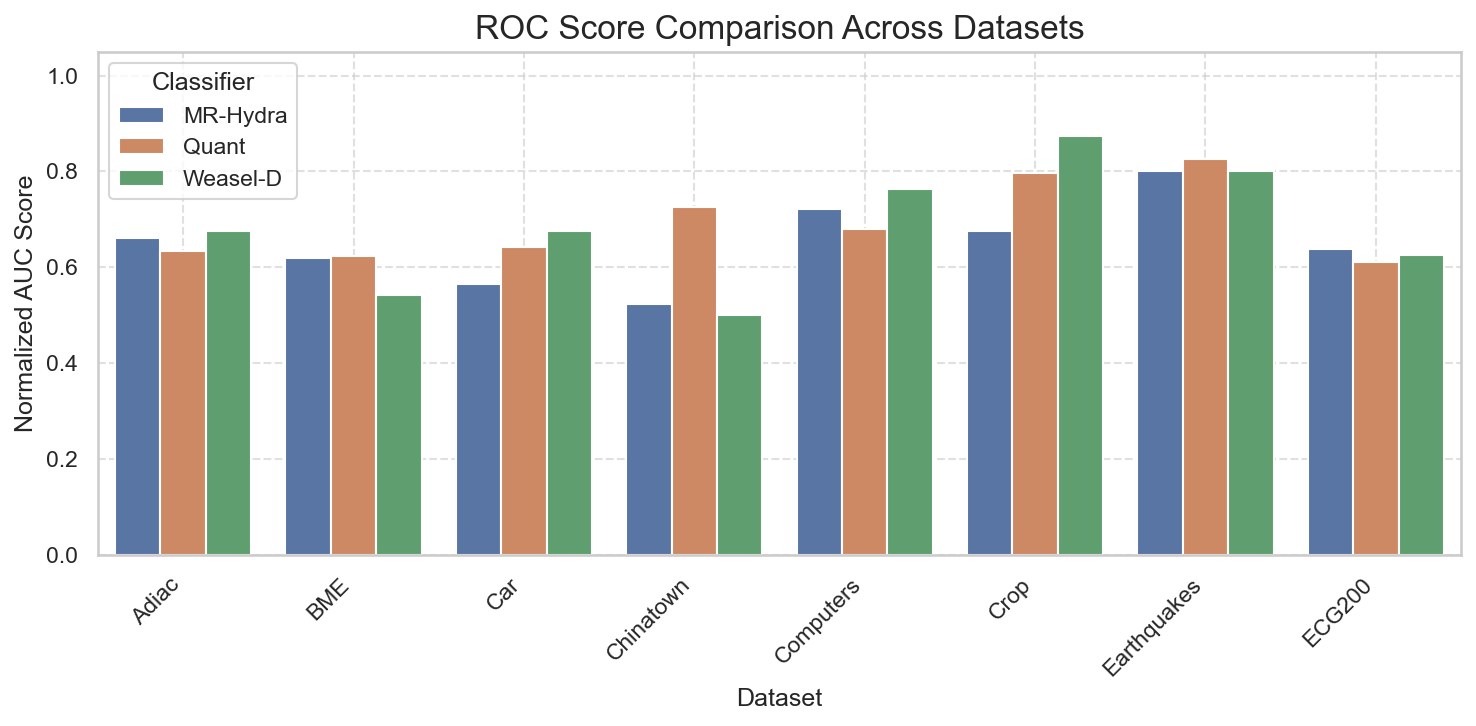

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'auc_summary_df' is your DataFrame
# It should have columns: 'Classifier_name', 'ds_name', 'auc_score'

plt.figure(figsize=(10, 5), dpi=150)
sns.set_theme(style="whitegrid")

# Create a grouped barplot
sns.barplot(
    data=auc_df,
    x='ds_name',
    y='auc_score',
    hue='Classifier_name',
    palette='deep'  # 'pastel', 'colorblind', 'deep', 'Set2'
)

# Enhance plot aesthetics
plt.title("AUC Score Comparison Across Datasets", fontsize=16)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Normalized AUC Score", fontsize=12)
plt.ylim(0, 1.05)  # AUC ranges from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classifier')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


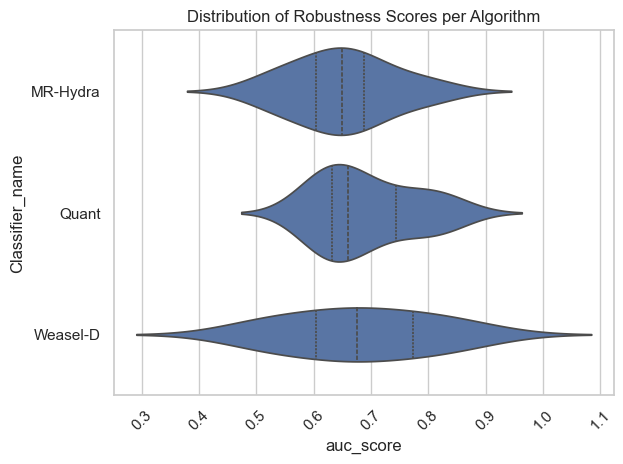

In [117]:
sns.violinplot(data=master_df, x="auc_score", y="Classifier_name", inner="quartile", cut=2.5)
plt.xticks(rotation=45)
plt.title("Distribution of Robustness Scores per Algorithm")
plt.tight_layout()
plt.show()